Project Title:
**Marketing Campaign for Banking Products**

Objective:
To predict the likelihood of a liability customer buying personal
loans.


#### **1. Importing the libraries required for EDA**

In [2]:
import numpy as np                      #linear algebra
import pandas as pd                     #data processing
import matplotlib.pyplot as plt         #visualisation library
import seaborn as sns                   #visualisation library
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### **2. Loading the datasets into Colab**

In [3]:
url = 'https://raw.githubusercontent.com/ishalijadhav/bank-load-modelling/master/data/Bank_Personal_Loan_Modelling.csv'

bank = pd.read_csv(url)

In [4]:
#top 5 records of the dataframe
bank.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### **3. Checking the data summary getting to know the data (datatypes, statistics, null values etc.)**

In [5]:
#datatype and missing value check
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**There are 14 features in total with no null values**



In [6]:
#there are 5000 records each having 14 features 
bank.shape

(5000, 14)

In [7]:
#statistical summary for all features
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Note:** Experience column has some negative values which can be determined from the min value -3.0.

In [8]:
bank.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

#### **4. Cleaning the data (dropping irrelevant columns, deleting negative values etc.)**

The ID column here is irrelavant as it doesn't provide any insight on the Personal Loan column. Also, Zip Code can be termed nominal for this dataset having many different values. Therefore they can be dropped.

In [9]:
bank.drop(['ID','ZIP Code'],axis=1,inplace=True)
bank.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


Since *Experience* has negative values and it is also highly correlated with *Age* (not required for a Linear Regression Model) we will drop the Experience column. 

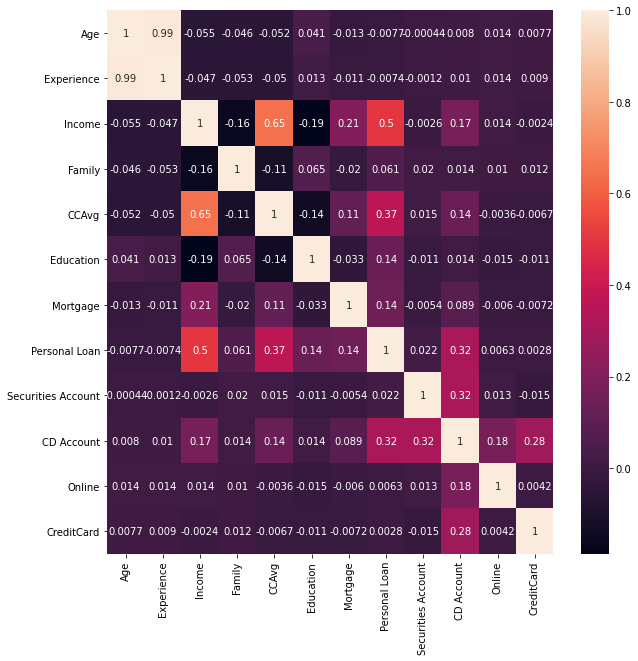

In [10]:
plt.subplots(figsize=(10,10))
sns.heatmap(bank.corr(),annot=True)

From the Heatmap we can make out that:
* *Income* is **moderately** correlated with both *CCAvg*(0.65) and *Personal Loan*(0.5).
* *Age* and *Experience* are **highly** correlated(0.99).

Hence, we will drop the Experience column to avoid multicollinearity, because it also has negative values as seen before in the statistical description of the dataset.


In [11]:
bank.drop(['Experience'],axis=1,inplace=True)
bank.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


#### **5. Exploratory Data Analysis(EDA)**

In [12]:
bank.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

**Observations:** 
* There are five binary variables(ones having only two possible categories) out of which *'Personal Loan'* is our target variable.
* Age, Income will be classified as interval variables.
* Education and Family will classified as categorical variables.

In [13]:
#No. of customers with zero Mortgage value.
bank[bank['Mortgage'] == 0].shape[0]

3462

In [14]:
#No. of people with zero credit card spending per month
bank[bank['CCAvg'] == 0].shape[0]

106

**Value Counts for categorical variables**

In [30]:
categorical = ['Education','Family','Securities Account','Online','CreditCard','CD Account']
for feature in categorical: 
  print(bank[feature].value_counts(),'\n')

1    2096
3    1501
2    1403
Name: Education, dtype: int64 

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64 

0    4478
1     522
Name: Securities Account, dtype: int64 

1    2984
0    2016
Name: Online, dtype: int64 

0    3530
1    1470
Name: CreditCard, dtype: int64 

0    4698
1     302
Name: CD Account, dtype: int64 



**Observations:**
*   Most of the people who have credit cards, do use it often.
*   Most of the customers belong to the Level 1 Education category i.e. Undergrad. 
*   Maximum of the customers own neither a CD Account nor a Securities Account.
*   About 7% customers don't use their credit cards often.





**Univariate Analysis**

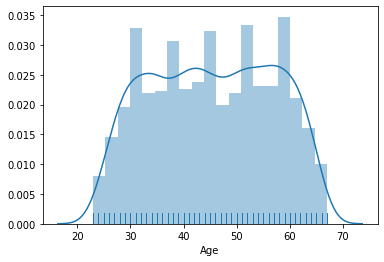

In [37]:
sns.distplot(bank['Age'],rug=True)

**Observations:**
*   Majority of the customers belong to the age group ranging from 30-60 years.
*   The variable is normally distributed.
*   This can also be verified from the describe table, where both mean and median tend to be equal i.e. about 45.





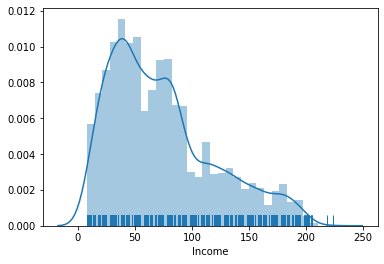

In [38]:
sns.distplot(bank['Income'],rug=True)

**Observations:**
*   Most of the customers have an income between 45-55K.
*   From the describe table, we can see that mean > median.
*   Hence, distribution is positively skewed.







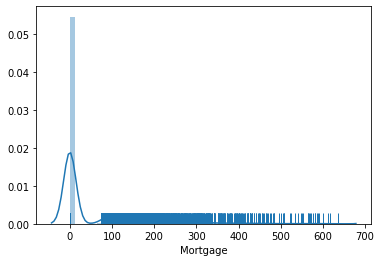

In [53]:
sns.distplot(bank['Mortgage'],rug=True)

**Observations:**
*   More than 80% customers have a Mortgage value less than 400K.
*   Moreover, about 70% people have a zero Mortgage value(as seen from a statement above).



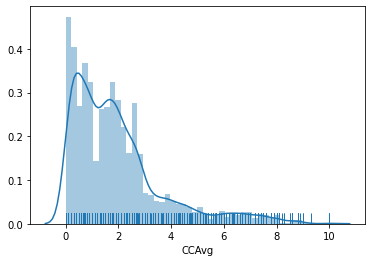

In [46]:
sns.distplot(bank['CCAvg'],rug=True)

**Observations:**
*   Majority of the customers spend about 0-2.5K on credit cards per month.
*   The distribution positively skewed, which can be confirmed by seeing that the mean is slightly greater than the median.





**Categorical Plots**

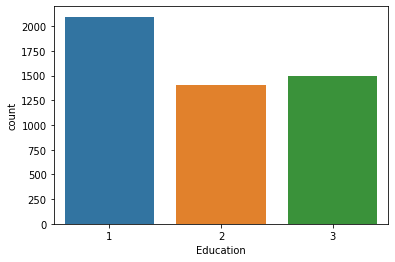

In [68]:
sns.countplot(bank['Education'])

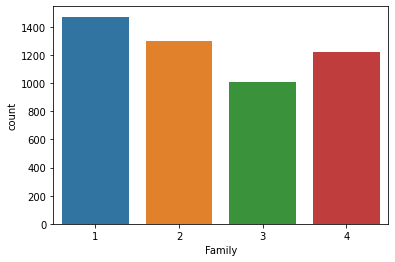

In [70]:
sns.countplot(bank['Family'])

**Bivariate/Multivariate Analysis**

In [71]:
bank.head(2)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0


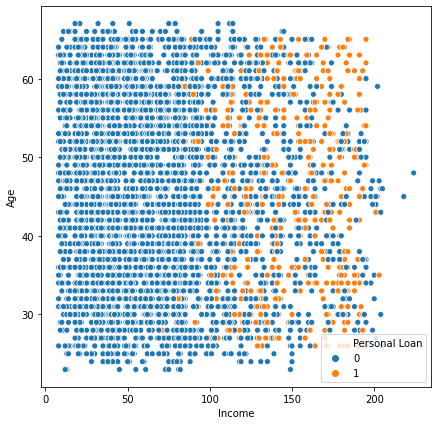

In [82]:
plt.subplots(figsize=(7,7))
sns.scatterplot(bank['Income'],bank['Age'],hue=bank['Personal Loan'])

**Observation:** People having income more than 100K are most likely to have a Personal Loan. Age does not affect much.




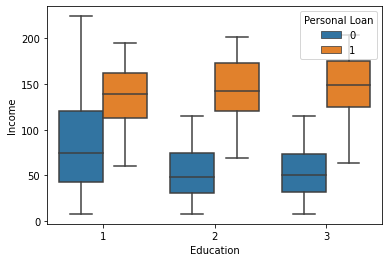

In [92]:
sns.boxplot(bank['Education'],bank['Income'],hue=bank['Personal Loan'])

**Observations:** 
*   People with Education Level 1 have higher income.
*   However, people across all Educational levels having almost similar Income have Personal Loans.

